In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
import numpy as np
import pandas as pd

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
data = pd.read_csv('../../data/FremontBridge.csv')
data.head()
data.shape

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


(50328, 3)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50328 entries, 0 to 50327
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          50328 non-null  datetime64[ns]
 1   Fremont Bridge East Sidewalk  50319 non-null  float64       
 2   Fremont Bridge West Sidewalk  50319 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,9.0,4.0
1,2012-10-03 01:00:00,6.0,4.0
2,2012-10-03 02:00:00,1.0,1.0
3,2012-10-03 03:00:00,3.0,2.0
4,2012-10-03 04:00:00,1.0,6.0


In [8]:
data.set_index('Date', inplace=True)

In [9]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [18]:
data = pd.read_csv('../../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [13]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [130]:
data.shape

(50328, 2)

In [19]:
data.columns = ['West', 'East']
data

,West,East
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0
...,...,...
2018-06-30 19:00:00,39.0,31.0
2018-06-30 20:00:00,30.0,13.0
2018-06-30 21:00:00,21.0,13.0


In [20]:
data['Total'] = data['West'] + data['East']

In [21]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0
...,...,...,...
2018-06-30 19:00:00,39.0,31.0,70.0
2018-06-30 20:00:00,30.0,13.0,43.0
2018-06-30 21:00:00,21.0,13.0,34.0


In [22]:
data.isnull().sum()

West     9
East     9
Total    9
dtype: int64

In [23]:
data = data.dropna()

In [24]:
data.describe()

,West,East,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


In [137]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


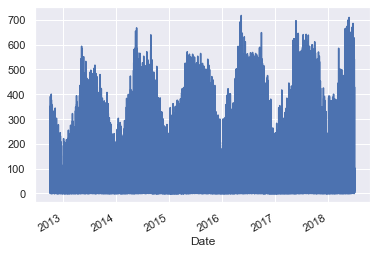

In [25]:
data['West'].plot()

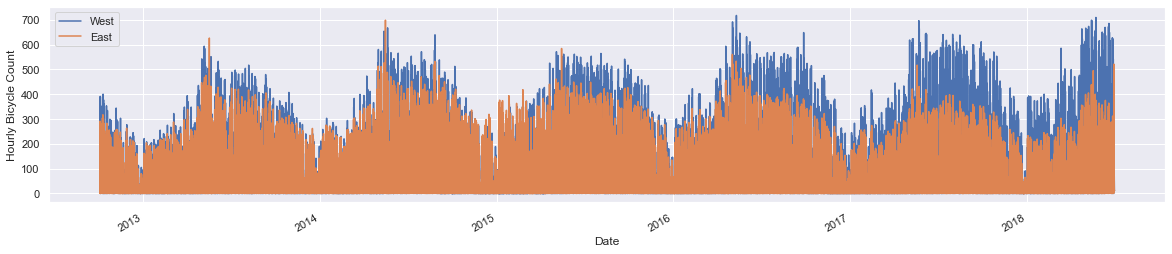

In [29]:
data[['West', 'East']].plot(figsize=(20,4))
plt.ylabel('Hourly Bicycle Count');

In [33]:
data.resample('W').sum()

,West,East,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0
2012-10-28,6536.0,6901.0,13437.0
2012-11-04,5786.0,6408.0,12194.0
...,...,...,...
2018-06-03,14462.0,10489.0,24951.0
2018-06-10,14490.0,10037.0,24527.0
2018-06-17,15748.0,10461.0,26209.0


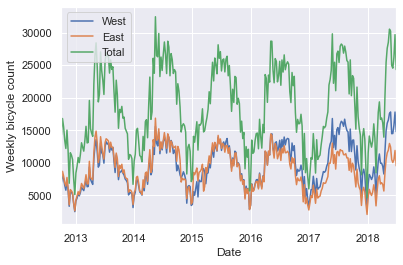

In [34]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bicycle count');

In [35]:
daily = data.resample('D').sum()
daily

,West,East,Total
Date,,,
2012-10-03,1761.0,1760.0,3521.0
2012-10-04,1767.0,1708.0,3475.0
2012-10-05,1590.0,1558.0,3148.0
2012-10-06,926.0,1080.0,2006.0
2012-10-07,951.0,1191.0,2142.0
...,...,...,...
2018-06-26,2914.0,1857.0,4771.0
2018-06-27,3019.0,1923.0,4942.0
2018-06-28,2707.0,1680.0,4387.0


In [40]:
daily.rolling(30).mean()

,West,East,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
...,...,...,...
2018-06-26,2252.866667,1536.966667,3789.833333
2018-06-27,2310.066667,1563.700000,3873.766667
2018-06-28,2309.733333,1562.000000,3871.733333


In [41]:
daily.rolling?

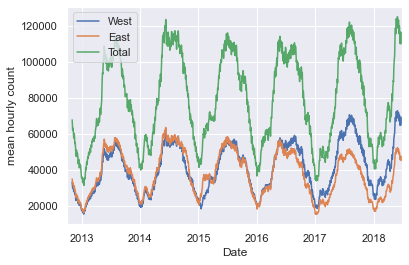

In [42]:
daily.rolling(30).sum().plot()
plt.ylabel('mean hourly count');

In [43]:
daily.rolling(3).sum()

,West,East,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,5118.0,5026.0,10144.0
2012-10-06,4283.0,4346.0,8629.0
2012-10-07,3467.0,3829.0,7296.0
...,...,...,...
2018-06-26,6541.0,4411.0,10952.0
2018-06-27,8115.0,5156.0,13271.0
2018-06-28,8640.0,5460.0,14100.0


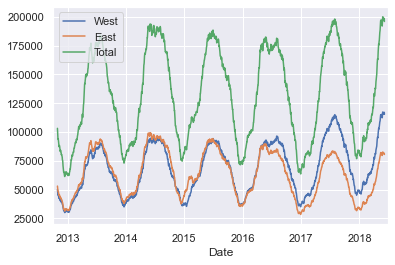

In [44]:
daily.rolling(50, center=True).sum().plot();

In [47]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0
...,...,...,...
2018-06-30 19:00:00,39.0,31.0,70.0
2018-06-30 20:00:00,30.0,13.0,43.0
2018-06-30 21:00:00,21.0,13.0,34.0


In [50]:
data.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=50319)

In [147]:
data.groupby(data.index.time).mean()
data.groupby(data.index.year).mean()
data.groupby(data.index.month).mean()

,West,East,Total
00:00:00,6.782546,5.215546,11.998093
01:00:00,3.407248,2.901764,6.309013
02:00:00,2.131931,2.087954,4.219885
03:00:00,1.388650,1.595613,2.984263
04:00:00,2.823557,3.484025,6.307582
05:00:00,9.134001,16.627563,25.761564
06:00:00,32.796853,57.628040,90.424893
07:00:00,74.120172,150.816881,224.937053
08:00:00,113.082022,201.425370,314.507392
09:00:00,76.731393,108.619752,185.351145


,West,East,Total
Date,,,
2012,34.387500,36.312037,70.699537
2013,51.300297,54.691825,105.992121
2014,56.041786,58.833885,114.875671
2015,55.457463,57.201667,112.659130
2016,58.541045,53.319367,111.860412
2017,62.864482,47.094988,109.959470
2018,69.078978,48.226341,117.305319


,West,East,Total
Date,,,
1,36.723342,36.196909,72.920251
2,38.714990,37.411736,76.126726
3,47.680870,43.496972,91.177843
4,57.563455,54.652617,112.216072
5,79.628584,74.505376,154.133961
6,79.568782,71.535201,151.103983
7,80.063441,74.777957,154.841398
8,78.265860,70.378763,148.644624
9,66.191944,61.608611,127.800556


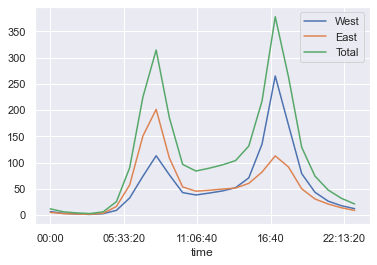

In [51]:
by_time = data.groupby(data.index.time).mean()
by_time.plot();

In [52]:
from datetime import datetime
datetime.today()

datetime.datetime(2021, 3, 25, 20, 3, 29, 152835)

In [53]:
datetime.today().strftime('%A')

'Thursday'

In [54]:
data.index.strftime('%A')

Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       ...
       'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday'],
      dtype='object', name='Date', length=50319)

In [55]:
data.groupby(data.index.dayofweek).mean()

,West,East,Total
Date,,,
0,67.893255,60.570792,128.464047
1,72.608168,65.434486,138.042654
2,72.106667,64.703472,136.810139
3,67.493056,61.649861,129.142917
4,61.201584,55.596694,116.798277
5,29.413472,31.789861,61.203333
6,27.801562,30.821782,58.623344


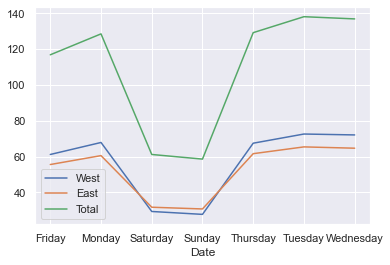

In [57]:
by_weekday = data.groupby(data.index.strftime('%A')).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot();

In [153]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [158]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2018-06-30 14:00:00', '2018-06-30 15:00:00',
               '2018-06-30 16:00:00', '2018-06-30 17:00:00',
               '2018-06-30 18:00:00', '2018-06-30 19:00:00',
               '2018-06-30 20:00:00', '2018-06-30 21:00:00',
               '2018-06-30 22:00:00', '2018-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=50319, freq=None)

In [58]:
np.where(data['West'] > 10)
type(np.where(data['West'] > 10))

(array([    6,     7,     8, ..., 50316, 50317, 50318], dtype=int64),)

tuple

In [59]:
data

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0
...,...,...,...
2018-06-30 19:00:00,39.0,31.0,70.0
2018-06-30 20:00:00,30.0,13.0,43.0
2018-06-30 21:00:00,21.0,13.0,34.0


In [60]:
data.where(data['West'] > 10).dropna()

,West,East,Total
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2018-06-30 19:00:00,39.0,31.0,70.0
2018-06-30 20:00:00,30.0,13.0,43.0
2018-06-30 21:00:00,21.0,13.0,34.0


In [61]:
np.where(data.index.weekday < 5)
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

(array([    0,     1,     2, ..., 50292, 50293, 50294], dtype=int64),)

In [70]:
data['new'] = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
dta

NameError: name 'dta' is not defined

In [63]:
data.groupby([weekend, data.index.time]).mean()

West        East       Total
Weekday 00:00:00    5.677570    4.524032   10.201602
        01:00:00    2.652203    2.345794    4.997997
        02:00:00    1.658879    1.717623    3.376502
        03:00:00    1.257677    1.463284    2.720961
        04:00:00    3.121495    4.177570    7.299065
        05:00:00   11.488652   21.580774   33.069426
        06:00:00   42.443925   77.341121  119.785047
        07:00:00   97.971963  204.359146  302.331108
        08:00:00  147.653538  269.373832  417.027370
        09:00:00   92.638611  134.694723  227.333333
        10:00:00   42.968604   53.894456   96.863059
        11:00:00   33.100868   39.279225   72.380094
        12:00:00   35.603206   39.314629   74.917836
        13:00:00   39.546061   41.441923   80.987984
        14:00:00   47.839786   43.969960   91.809746
        15:00:00   74.164219   57.078772  131.242991
        16:00:00  166.096128   89.437250  255.533378
        17:00:00  350.750334  136.798398  487.548732
        18:00:00  224.821095  111.507343  336.328438
        19:00:00   99.644192   59.183578  158.827770
        20:00:00   52.670227   35.348465   88.018692
        21:00:00   31.110814   24.193591   55.304406
        22:00:00   20.170895   15.648865   35.819760
        23:00:00   13.096128    9.482644   22.578772
Weekend 00:00:00    9.545910    6.944908   16.490818
        01:00:00    5.295492    4.292154    9.587646
        02:00:00    3.324916    3.021886    6.346801
        03:00:00    1.716194    1.926544    3.642738
        04:00:00    2.078464    1.749583    3.828047
        05:00:00    3.245409    4.240401    7.485810
        06:00:00    8.671119    8.328881   17.000000
        07:00:00   14.470785   16.916528   31.387312
        08:00:00   26.624374   31.497496   58.121870
        09:00:00   36.976628   43.454090   80.430718
        10:00:00   42.921536   53.320534   96.242070
        11:00:00   51.676127   61.450751  113.126878
        12:00:00   57.891486   67.459098  125.350584
        13:00:00   62.302170   70.053422  132.355593
        14:00:00   63.383973   70.664441  134.048414
        15:00:00   62.979967   69.353923  132.333890
        16:00:00   58.173623   63.382304  121.555927
        17:00:00   50.275459   52.961603  103.237062
        18:00:00   38.590985   41.908180   80.499165
        19:00:00   27.233723   27.574290   54.808013
        20:00:00   20.891486   19.317195   40.208681
        21:00:00   15.410684   13.632721   29.043406
        22:00:00   12.422371   10.140234   22.562604
        23:00:00   10.305509    7.535893   17.841402

In [64]:
by_time = data.groupby([weekend, data.index.time]).mean()

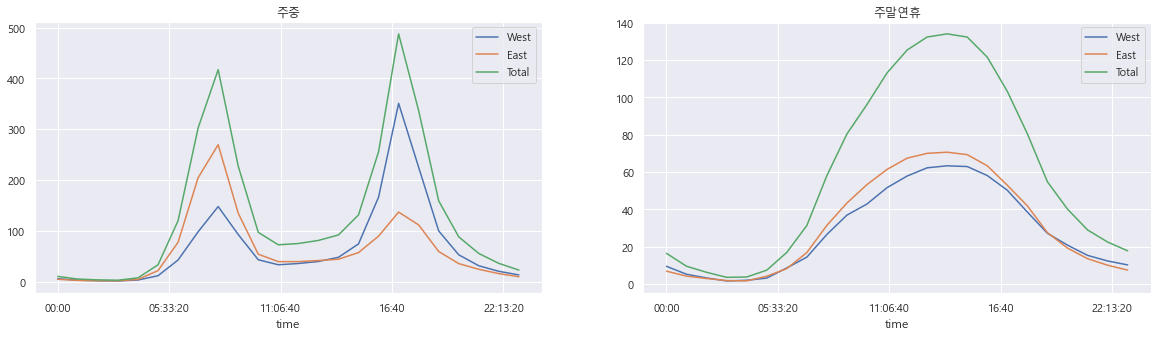

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='주중')
by_time.loc['Weekend'].plot(ax=ax[1], title='주말연휴');